# Gaussian smoothing a time series

Here the weight the following and previous time points according to a gaussian

y_t = Sigma^(t+k)_(i=t-k) {x_i*g_i}

Doesnt's need a normalizing factor becasue gausian goes to 1.-- i.e. total porp density goes to 1
Gaussian: g = e^( -4*ln(2)t^2 / w^2) , t should be centered around 0. w = width, for FWHM

Often much smoother than Mean smoothing filter

In [16]:
import numpy as np
import matplotlib.pyplot as mplt
import copy

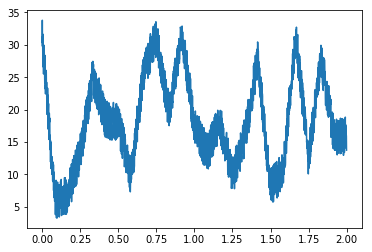

In [46]:
# Creating the Signal
srate = 1000 #Hz
time = np.arange(0,2,1/srate) #.arrange() creates evenly spaced values, args:a = start val,b = end value but not counted,c = step value
n = len(time)
p = 25 # numb of poles for random interpolation

# noise level, measured in standard deviations
noiseamp = 6
# amplitutde modulator and noise level
ampl = np.interp(np.linspace(1,p,n),np.arange(0,p),np.random.rand(p)*30)
noise = noiseamp * np.random.rand(n)
signal = ampl + noise

mplt.plot(time,signal)
mplt.show()

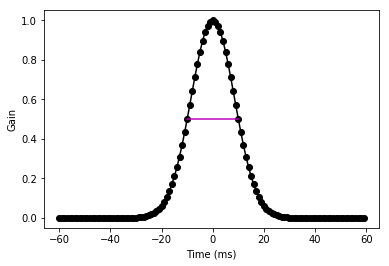

In [47]:
# Create gaussian kernal

# FWHM
fwhm = 20 # in ms

# normalized time vector in ms
k = 60 # k = 100 # param is arbitrary but should be large enough to allow kernel ends to approx/reach to zero on the left
                    # as well as not cuase major edge effect on the right
    # k = the overall time for the kernel to be fully represented
    # k values affects the value of FWHM
gtime = 1000*np.arange(-k,k) / srate

#create gaussian window
gausswind = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 ) # mt.e(-(4*mt.log(2)*gtime**2) / fwhm**2 )

#compute empirical fwhm
prePeakHalf = k + np.argmin((gausswind[k:]-.5)**2) # in matlab =  dsearchin(gausswind(range), .5)
postPeakHalf = np.argmin((gausswind-.5)**2)     # .argmin()

empFWHM = gtime[postPeakHalf] - gtime[prePeakHalf]

# show the gaussian
mplt.plot(gtime,gausswind,'ko-')
mplt.plot([gtime[prePeakHalf],gtime[postPeakHalf]],[gausswind[prePeakHalf],gausswind[postPeakHalf]],'m')

# then normalize Gaussian to unit energy
gausswind = gausswind / np.sum(gausswind)
# mplt.title([ 'Gaussian kernel with requeted FWHM ', num2str(fwhm) ,' ms (' num2str(empFWHM) ' ms achieved)' ])
mplt.xlabel('Time (ms)')
mplt.ylabel('Gain')

mplt.show()

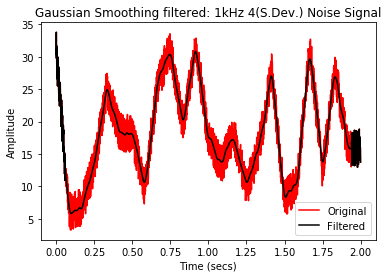

In [49]:
# implementing the filter to the signal

# initializing filtered signal vector
filtsigG = copy.deepcopy(signal)

# implement the running mean filter
for i in range(k+1,n-k):
    filtsigG[i] = np.sum(signal[i-k:i+k]*gausswind)
    
mplt.plot(time,signal,label='Original',color='red')
mplt.plot(time,filtsigG,label='Filtered',color='black')
mplt.xlabel('Time (secs)')
mplt.ylabel('Amplitude')
mplt.title("Gaussian Smoothing filtered: 1kHz 4(S.Dev.) Noise Signal")
mplt.legend(loc='best')

mplt.show()

Factors: 
- The total 'time' for the noise 
- The noise amplitutde, higher the value, higher the noise
- FWHM , see affects on the kernal shape withe differnt FWHM val. A better defined kernel is sharper.
- Normalized time vector: k . make sure the kernal is represented well - but since Gaussian will already have large    edge affects, a very high k (showing lots of zeros rep on the kernal), will exacerbate the edge affects.